In [ ]:
!pip install pmdarima

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import base64
import requests
import json



# Step 1: Load the Data

In [ ]:

# Replace with your GitHub details
github_token = "your token"
repo_owner = "your username"
repo_name = "your repo name"
file_path = "data/Nat_Gas.csv"

# GitHub API URL
github_api_url = f"https://api.github.com/repos/{repo_owner}/{repo_name}/contents/{file_path}"

# Request the file with authentication
headers = {"Authorization": f"token {github_token}"}
response = requests.get(github_api_url, headers=headers)

if response.status_code == 200:
    file_info = response.json()
    file_download_url = file_info['download_url']

    # Load the CSV file
    df = pd.read_csv(file_download_url)

else:
    print(f"❌ Error: Unable to fetch file. Status Code: {response.status_code}")


# Step 2: Explore the Data

In [ ]:
# Drop any unnecessary columns
df = df.iloc[:, :2]  # Keep only first two columns (Dates, Prices)

# Convert 'Dates' column to datetime format
df['Dates'] = pd.to_datetime(df['Dates'], format="%m/%d/%y")

# Set 'Dates' as index
df.set_index("Dates", inplace=True)

# Display first few rows
print(df.head())


            Prices
Dates             
2020-10-31    10.1
2020-11-30    10.3
2020-12-31    11.0
2021-01-31    10.9
2021-02-28    10.9


# Step 3: Visualize the Data

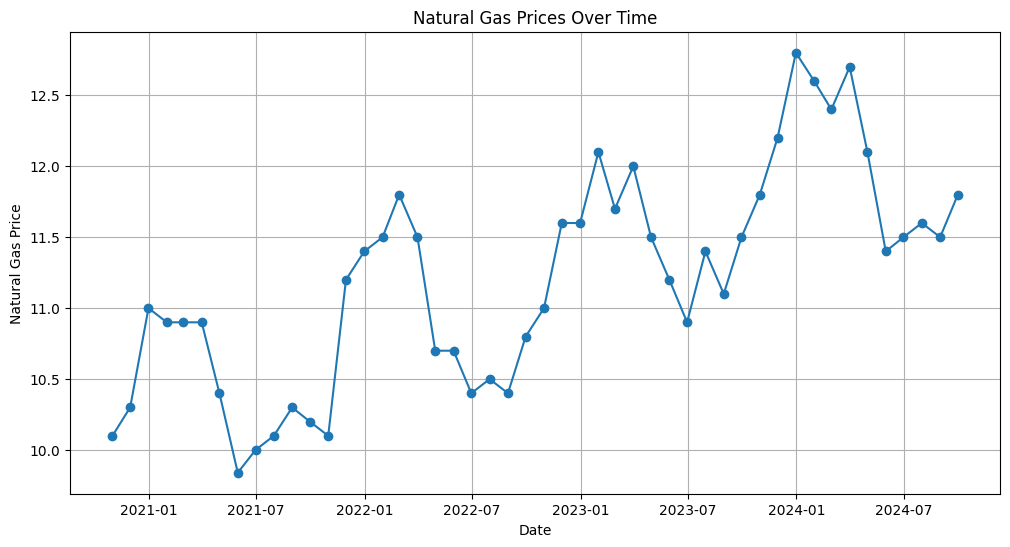

In [ ]:

# Plot the time-series data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Prices'], marker='o', linestyle='-')
plt.xlabel("Date")
plt.ylabel("Natural Gas Price")
plt.title("Natural Gas Prices Over Time")
plt.grid()
plt.show()


# Step 4: Estimate Past Prices (Interpolation)

In [ ]:
# Resample daily and interpolate missing values
df_daily = df.resample('D').interpolate()

# Function to estimate price for any given date
def estimate_past_price(date):
    date = pd.to_datetime(date)
    if date in df_daily.index:
        return df_daily.loc[date, 'Prices']
    else:
        return "Date out of range"

# Example usage
print(estimate_past_price("2022-06-15"))


10.55


# Step 5: Forecast Future Prices (Using ARIMA)

ADF Statistic: 0.21807686169999427
p-value: 0.973257438844869
⚠️ Data is NOT stationary (p-value > 0.05), differencing recommended!

After Differencing:
ADF Statistic: -6.844773557477344
p-value: 1.754169685294091e-09
✅ Data is stationary (p-value ≤ 0.05)

🔍 Finding the Best ARIMA Model...
ARIMA(0,1,0) - AIC: 46.740639073109776


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_date

ARIMA(0,1,1) - AIC: 48.51341755187619


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


ARIMA(0,1,2) - AIC: 49.88219300428271


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


ARIMA(0,1,3) - AIC: 50.4966362585932
ARIMA(1,1,0) - AIC: 48.46456752388278


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_date

ARIMA(1,1,1) - AIC: 50.30275213489862


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Us

ARIMA(1,1,2) - AIC: 51.52420693823806


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


ARIMA(1,1,3) - AIC: 51.244181782155216
ARIMA(2,1,0) - AIC: 49.907794090186314


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_date

ARIMA(2,1,1) - AIC: 51.907633159664414


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Us

ARIMA(2,1,2) - AIC: 35.804310807229385
ARIMA(2,1,3) - AIC: 51.95442072275509
ARIMA(3,1,0) - AIC: 51.90727621940423


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_date

ARIMA(3,1,1) - AIC: 53.907791928147866


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Us

ARIMA(3,1,2) - AIC: 51.98036824363773


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Us

ARIMA(3,1,3) - AIC: 53.27006203196503

✅ Best ARIMA Model: ARIMA(2, 1, 2) with AIC=35.804310807229385


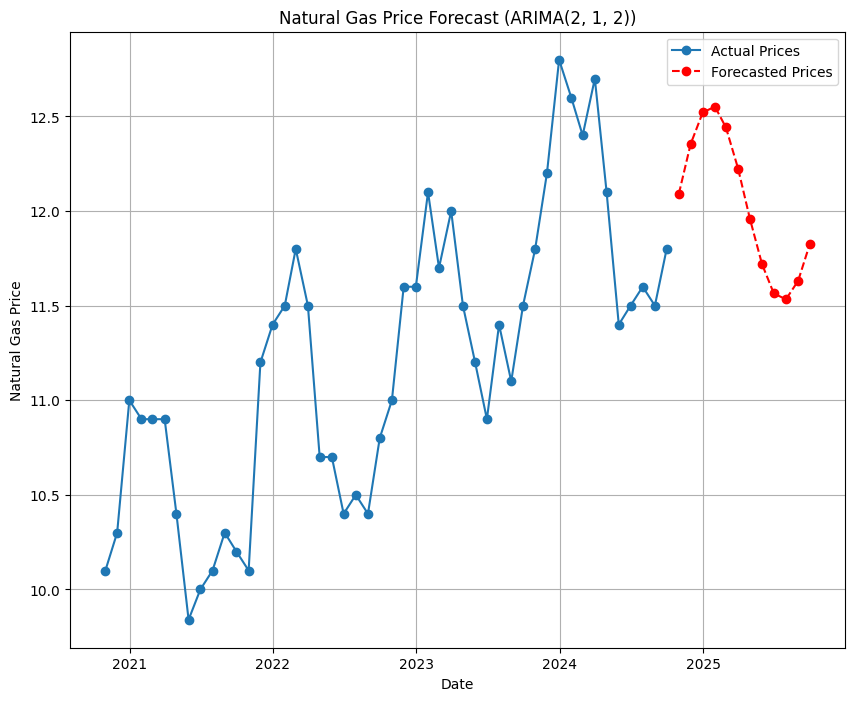

In [ ]:

warnings.simplefilter(action='ignore', category=FutureWarning)  # Suppress warnings

# ✅ Step 1: Check Stationarity
def check_stationarity(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] <= 0.05:
        print("✅ Data is stationary (p-value ≤ 0.05)")
    else:
        print("⚠️ Data is NOT stationary (p-value > 0.05), differencing recommended!")

check_stationarity(df['Prices'])

# ✅ Step 2: Apply First-Order Differencing
df_diff = df.diff().dropna()

# ✅ Step 3: Check Stationarity After Differencing
print("\nAfter Differencing:")
check_stationarity(df_diff['Prices'])

# ✅ Step 4: Manually Tune ARIMA (p,d,q)
p_values = [0, 1, 2, 3]
d_values = [1]  # Differencing applied
q_values = [0, 1, 2, 3]

best_aic = float("inf")
best_order = None
best_model = None

print("\n🔍 Finding the Best ARIMA Model...")

for p in p_values:
    for d in d_values:
        for q in q_values:
            try:
                model = ARIMA(df['Prices'], order=(p, d, q))
                model_fit = model.fit()
                aic = model_fit.aic  # Akaike Information Criterion

                print(f"ARIMA({p},{d},{q}) - AIC: {aic}")

                if aic < best_aic:
                    best_aic = aic
                    best_order = (p, d, q)
                    best_model = model_fit
            except:
                continue

print(f"\n✅ Best ARIMA Model: ARIMA{best_order} with AIC={best_aic}")

# ✅ Step 5: Forecast for Next 12 Months Using Best Model
forecast_steps = 12
forecast = best_model.forecast(steps=forecast_steps)

# ✅ Step 6: Create Future Date Range
future_dates = pd.date_range(start=df.index[-1], periods=forecast_steps + 1, freq='ME')[1:]

# ✅ Step 7: Store Predictions in DataFrame
forecast_df = pd.DataFrame({'Dates': future_dates, 'Prices': forecast})

# ✅ Step 8: Plot Actual Data & Forecast
plt.figure(figsize=(10,8))
plt.plot(df.index, df['Prices'], label="Actual Prices", marker='o', linestyle='-')
plt.plot(forecast_df['Dates'], forecast_df['Prices'], label="Forecasted Prices", marker='o', linestyle='dashed', color='red')
plt.xlabel("Date")
plt.ylabel("Natural Gas Price")
plt.title(f"Natural Gas Price Forecast (ARIMA{best_order})")
plt.legend()
plt.grid()
plt.show()



# Step 6: Save Processed Data

In [ ]:
# Save interpolated data
df_daily.to_csv("interpolated_gas_prices.csv")

# Save forecasted data
forecast_df.to_csv("forecasted_gas_prices.csv", index=False)

print("✅ Processed data saved successfully!")


✅ Processed data saved successfully!


# Step 7: Upload Processed Data Back to GitHub

In [ ]:


# ✅ Define file paths
file_paths = ["interpolated_gas_prices.csv", "forecasted_gas_prices.csv"]

# ✅ Function to upload file to GitHub
def upload_to_github(file_path):
    # Construct the GitHub API URL for the file
    upload_url = f"https://api.github.com/repos/{repo_owner}/{repo_name}/contents/data/{file_path}"

    # Read file content & encode to Base64
    with open(file_path, "rb") as file:
        content = file.read()
        encoded_content = base64.b64encode(content).decode("utf-8")  # Proper Base64 encoding

    # Check if file already exists to get the `sha`
    response = requests.get(upload_url, headers={"Authorization": f"Bearer {github_token}"})
    sha = response.json().get("sha", None) if response.status_code == 200 else None

    # Construct the payload
    payload = {
        "message": f"Updating {file_path}",
        "content": encoded_content,
        "branch": "main"
    }

    if sha:
        payload["sha"] = sha  # Required for updating existing file

    # Send the request
    response = requests.put(upload_url, headers={"Authorization": f"Bearer {github_token}"}, json=payload)

    if response.status_code in [200, 201]:
        print(f"✅ Successfully uploaded {file_path} to GitHub.")
    else:
        print(f"❌ Failed to upload {file_path}. Error: {response.text}")

# ✅ Upload both processed CSV files
for file in file_paths:
    upload_to_github(file)


✅ Successfully uploaded interpolated_gas_prices.csv to GitHub.
✅ Successfully uploaded forecasted_gas_prices.csv to GitHub.
